In [1]:
import torch
torch.cuda.is_available(), torch.version.cuda, torch.backends.cudnn.version()

(False, '12.4', 90300)

download the dataset at https://drive.google.com/file/d/0B7EVK8r0v71pa2EyNEJ0dE9zbU0/view?usp=drive_link&resourcekey=0-CPiKS-AiE8IDonk54WJ5_w

In [2]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzip the dataset
import zipfile

zip_path = "/content/drive/MyDrive/img.zip"
extract_to = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [4]:
import os

img_path = '/content/dataset/img'

subdirs = [d for d in os.listdir(img_path) if os.path.isdir(os.path.join(img_path, d))]

print("Subdirectories under 'img':")
for subdir in subdirs:
    print(subdir)

Subdirectories under 'img':
Marled_Dolphin_Hem_Sweater
Embroidered_Peasant_Dress
Eyelash_Lace_Sheath_Dress
Contrast_Knee_Panel_Sweatpants
Semi-Sheer_Ornate_Crochet_Dress
Classic_V-Neck_Tee
Heathered_Graphite_Floral_Sweatshorts
Acid_Wash_French_Terry_Sweatshorts
Space_Dye_Waist_Running_Shorts
Slub_Knit_Boyfriend_Tee
Clustered_Rose_Print_Jumpsuit
Textured_Floral_Pattern_Skirt
Faux_Leather_Fringe_Skirt
Drawstring_Dolphin_Shorts
Abstract_Ikat_Print_Shorts
High-Rise_Denim_Shorts
Purl_Knit_Sweater
Ornate_Print_Open-Shoulder_Dress
Abstract_Tile_Print_Kimono
Longline_Cotton_Shirt_Dress
Hooded_Puff_Parka
Polka_Dot_Cropped_Blouse
Quilted_Open-Front_Blazer
Faux_Leather_Drawstring_Joggers
Fit_&_Flare_Combo_Cami_Dress
V-Cut_Fit_&_Flare_Dress
Twist-Back_Colorblocked_Dress
Lace_Insert_Bodycon_Dress
Abstract_Geo_Print_Romper
Boxy_Chambray_Tank_Top
Reason_Statue_of_Liberty_Mesh_Tank
Mesh-Paneled_Scuba_Knit_Tee
Candy_Stripper_Denim_Shorts
Ornate_Print_Peasant_Tank
Floral_Crisscross_Cami_Dress
Striped_Op

Script to reorganize dataset into 50 high-level categories
Run only once.

In [5]:
import os
import shutil

# Set your root directory path
root_dir = 'dataset/img'

# List of 50 labels (class names)
categories = [
    "Anorak", "Blazer", "Blouse", "Bomber", "Button-Down", "Cardigan", "Flannel", "Halter",
    "Henley", "Hoodie", "Jacket", "Jersey", "Parka", "Peacoat", "Poncho", "Sweater", "Tank",
    "Tee", "Top", "Turtleneck", "Capris", "Chinos", "Culottes", "Cutoffs", "Gauchos", "Jeans",
    "Jeggings", "Jodhpurs", "Joggers", "Leggings", "Sarong", "Shorts", "Skirt", "Sweatpants",
    "Sweatshorts", "Trunks", "Caftan", "Cape", "Coat", "Coverup", "Dress", "Jumpsuit", "Kaftan",
    "Kimono", "Nightdress", "Onesie", "Robe", "Romper", "Shirtdress", "Sundress"
]
categories_lower = [c.lower() for c in categories]

# Go through each folder in root_dir
for subfolder in os.listdir(root_dir):
    subfolder_path = os.path.join(root_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue  # skip files

    subfolder_lower = subfolder.lower()
    matched = False

    for category, category_lower in zip(categories, categories_lower):
        if category_lower in subfolder_lower:
            target_dir = os.path.join(root_dir, category)
            os.makedirs(target_dir, exist_ok=True)

            for file in os.listdir(subfolder_path):
                src_path = os.path.join(subfolder_path, file)
                dst_path = os.path.join(target_dir, file)

                if os.path.isfile(src_path):
                    try:
                        shutil.move(src_path, dst_path)
                    except Exception as e:
                        print(f" Failed to move {src_path} → {dst_path}: {e}")

            matched = True
            break

    if matched:
        try:
            os.rmdir(subfolder_path)
        except OSError:
            print(f" Folder not empty or error removing: {subfolder_path}")

print("Reorganization complete.")



Reorganization complete.


Pick 20 most popular categories in Fashion and split into train_data and test_data

In [6]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define the root directory of the full dataset
root_dir = 'dataset/img'  # Adjust if needed

# Define the top 20 categories you want to keep
top_20_categories = [
    'Blazer', 'Blouse', 'Bomber', 'Anorak', 'Button-Down',
    'Jacket', 'Peacoat', 'Dress', 'Sweater', 'Jeans',
    'Shorts', 'Parka', 'Cardigan', 'Jumpsuit', 'Halter',
    'Tee', 'Hoodie', 'Skirt', 'Romper', 'Coat'
]

# Initialize lists to store file paths and corresponding labels
image_paths = []
labels = []

# Collect only images from the top 20 categories
for category in top_20_categories:
    category_path = os.path.join(root_dir, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            if image_name.endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(category_path, image_name))
                labels.append(category)

# Shuffle the data
combined = list(zip(image_paths, labels))
random.shuffle(combined)
image_paths, labels = zip(*combined)

# Split into train and test
train_paths, test_paths = train_test_split(
    image_paths, test_size=0.2, random_state=42, stratify=labels
)

# Create directories for training and testing
train_dir = 'train_data'
test_dir = 'test_data'

# Delete old directories if they exist
shutil.rmtree(train_dir, ignore_errors=True)
shutil.rmtree(test_dir, ignore_errors=True)

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create category directories under train and test
for category in top_20_categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Copy images to train and test folders
def move_images(image_paths, target_dir):
    for image_path in image_paths:
        category = os.path.basename(os.path.dirname(image_path))  # Extract category
        target_category_dir = os.path.join(target_dir, category)
        shutil.copy(image_path, target_category_dir)

move_images(train_paths, train_dir)
move_images(test_paths, test_dir)

print("Data has been split and organized for the top 20 categories only.")


Data has been split and organized for the top 20 categories only.


1st Model

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define any transforms you need
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),              # Resize first
    transforms.RandomResizedCrop(224),          # Random crop to 224x224
    transforms.RandomHorizontalFlip(),          # Random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load training and testing datasets
train_dataset = datasets.ImageFolder(root='train_data', transform=train_transform)
test_dataset = datasets.ImageFolder(root='test_data', transform=test_transform)

# Load them into DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(train_dataset.classes)

['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan', 'Coat', 'Dress', 'Halter', 'Hoodie', 'Jacket', 'Jeans', 'Jumpsuit', 'Parka', 'Peacoat', 'Romper', 'Shorts', 'Skirt', 'Sweater', 'Tee']


Install this only once/

In [8]:
!pip install --upgrade torch torchvision efficientnet-pytorch


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 7.3 MB/s eta 0:00:00
   ━━

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from efficientnet_pytorch import EfficientNet

In [3]:
model = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


100%|██████████| 20.4M/20.4M [00:00<00:00, 108MB/s] 


Loaded pretrained weights for efficientnet-b0


In [4]:
for param in model.parameters():
    param.requires_grad = False

In [5]:
in_features = model._fc.in_features  # Get the number of input features to the final layer
model._fc = nn.Linear(in_features, len(train_dataset.classes))  # Replace the classifier layer


In [6]:
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model._fc.parameters(), lr=0.001)  # Optimizer for the new classifier

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

Epoch [1/10], Loss: 2.8308, Accuracy: 15.32%
Epoch [2/10], Loss: 2.5133, Accuracy: 28.93%
Epoch [3/10], Loss: 2.3173, Accuracy: 35.28%
Epoch [4/10], Loss: 2.1900, Accuracy: 37.62%
Epoch [5/10], Loss: 2.1232, Accuracy: 38.65%
Epoch [6/10], Loss: 2.0433, Accuracy: 40.88%
Epoch [7/10], Loss: 1.9785, Accuracy: 42.77%
Epoch [8/10], Loss: 1.9541, Accuracy: 44.43%
Epoch [9/10], Loss: 1.9111, Accuracy: 43.17%
Epoch [10/10], Loss: 1.8365, Accuracy: 46.14%


In [8]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')




Test Accuracy: 16.89%


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [10]:
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

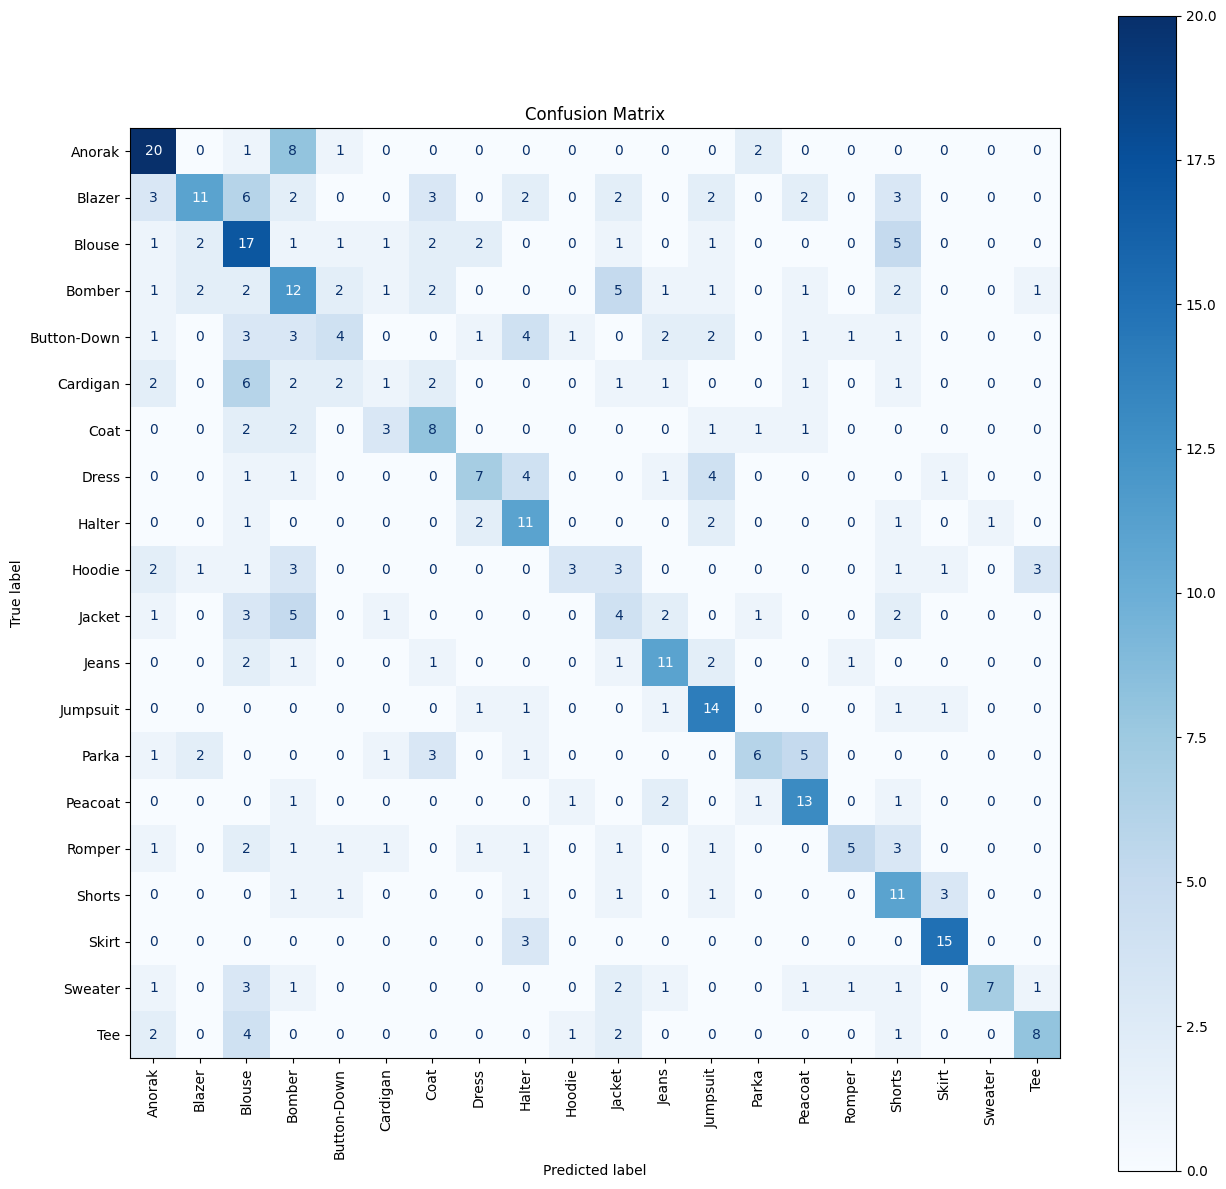

In [11]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)

fig, ax = plt.subplots(figsize=(15, 15))  # Adjust size depending on number of classes
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Second Model with finetuned layers + augmnentation + LR + more epoch training

In [28]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define any transforms you need
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet mean
                         [0.229, 0.224, 0.225])  # ImageNet std
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load training and testing datasets
train_dataset = datasets.ImageFolder(root='train_data', transform=train_transform)
test_dataset = datasets.ImageFolder(root='test_data', transform=test_transform)

# Load them into DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example: check class labels
print(train_dataset.classes)

['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan', 'Coat', 'Dress', 'Halter', 'Hoodie', 'Jacket', 'Jeans', 'Jumpsuit', 'Parka', 'Peacoat', 'Romper', 'Shorts', 'Skirt', 'Sweater', 'Tee']


In [29]:
#pip install torch torchvision efficientnet-pytorch


In [30]:
model = EfficientNet.from_pretrained('efficientnet-b0')

Loaded pretrained weights for efficientnet-b0


In [31]:
for name, param in model.named_parameters():
    if 'blocks.7' in name or '_conv_head' in name or '_fc' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [32]:
in_features = model._fc.in_features  # Get the number of input features to the final layer
model._fc = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(in_features, len(train_dataset.classes))
    )

In [33]:
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)  # Optimizer for the new classifier

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

if device.type == 'cuda':
    torch.cuda.empty_cache()
num_epochs = 10
best_test_accuracy = 0.0
epochs_no_improve = 0
patience = 7 # Number of epochs to wait for improvement
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')


Epoch [1/10], Loss: 2.8097, Accuracy: 15.89%
Epoch [2/10], Loss: 2.3435, Accuracy: 37.22%
Epoch [3/10], Loss: 1.9666, Accuracy: 45.28%
Epoch [4/10], Loss: 1.7111, Accuracy: 53.46%
Epoch [5/10], Loss: 1.5007, Accuracy: 59.12%
Epoch [6/10], Loss: 1.3404, Accuracy: 63.35%
Epoch [7/10], Loss: 1.2047, Accuracy: 66.67%
Epoch [8/10], Loss: 1.0970, Accuracy: 71.53%
Epoch [9/10], Loss: 0.9866, Accuracy: 74.44%
Epoch [10/10], Loss: 0.8828, Accuracy: 76.90%


In [35]:
# Evaluate on test set after each epoch
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      _, predicted = torch.max(outputs, 1)
      total_test += labels.size(0)
      correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Early Stopping Logic
if test_accuracy > best_test_accuracy:
  best_test_accuracy = test_accuracy
  epochs_no_improve = 0
  # Save the model state dictionary for the best performing model on the test set
  torch.save(model.state_dict(), 'best_model_state_dict.pth')
  print("Saved best model state.")
else:
  epochs_no_improve += 1
# Evaluate on test set after each epoch
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      _, predicted = torch.max(outputs, 1)
      total_test += labels.size(0)
      correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Early Stopping Logic
if test_accuracy > best_test_accuracy:
  best_test_accuracy = test_accuracy
  epochs_no_improve = 0
  # Save the model state dictionary for the best performing model on the test set
  torch.save(model.state_dict(), 'best_model_state_dict.pth')
  print("Saved best model state.")
else:
  epochs_no_improve += 1
  if epochs_no_improve >= patience:
    print(f"Early stopping after {patience} epochs without improvement.")

scheduler.step()

# After the loop, you can load the best model if you saved it
# model.load_state_dict(torch.load('best_model_state_dict.pth'))
# print(f"Loaded best model with test accuracy: {best_test_accuracy:.2f}%")

# After the loop, you can load the best model if you saved it
# model.load_state_dict(torch.load('best_model_state_dict.pth'))
# print(f"Loaded best model with test accuracy: {best_test_accuracy:.2f}%")




Test Accuracy: 52.05%
Saved best model state.
Test Accuracy: 52.05%


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

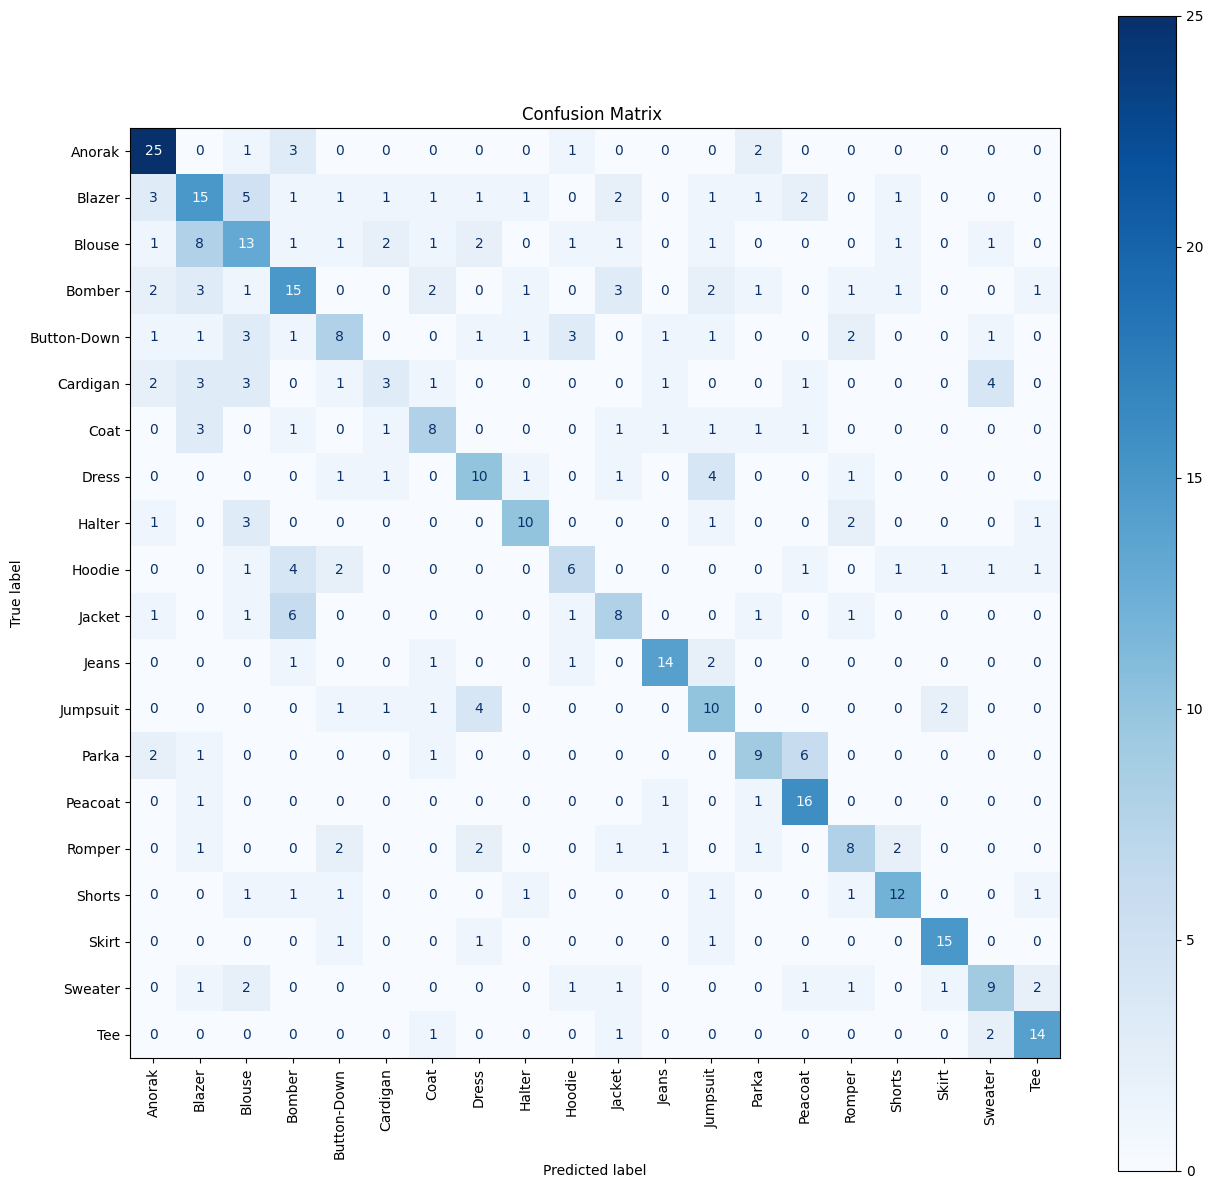

In [37]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)

fig, ax = plt.subplots(figsize=(15, 15))  # Adjust size depending on number of classes
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix ")
plt.show()

In [ ]:
print(classification_report(all_labels, all_preds, target_names=class_names))


              precision    recall  f1-score   support

      Anorak       0.76      0.69      0.72        32
      Blazer       0.44      0.61      0.51        36
      Blouse       0.53      0.53      0.53        34
      Bomber       0.64      0.85      0.73        33
 Button-Down       0.89      1.00      0.94        24
    Cardigan       0.82      0.47      0.60        19
        Coat       0.42      0.44      0.43        18
       Dress       0.44      0.63      0.52        19
      Halter       0.55      0.61      0.58        18
      Hoodie       0.93      0.78      0.85        18
      Jacket       0.33      0.16      0.21        19
       Jeans       0.39      0.47      0.43        19
    Jumpsuit       0.57      0.42      0.48        19
       Parka       0.64      0.47      0.55        19
     Peacoat       0.89      0.89      0.89        19
      Romper       0.47      0.50      0.49        18
      Shorts       0.52      0.63      0.57        19
       Skirt       0.69    

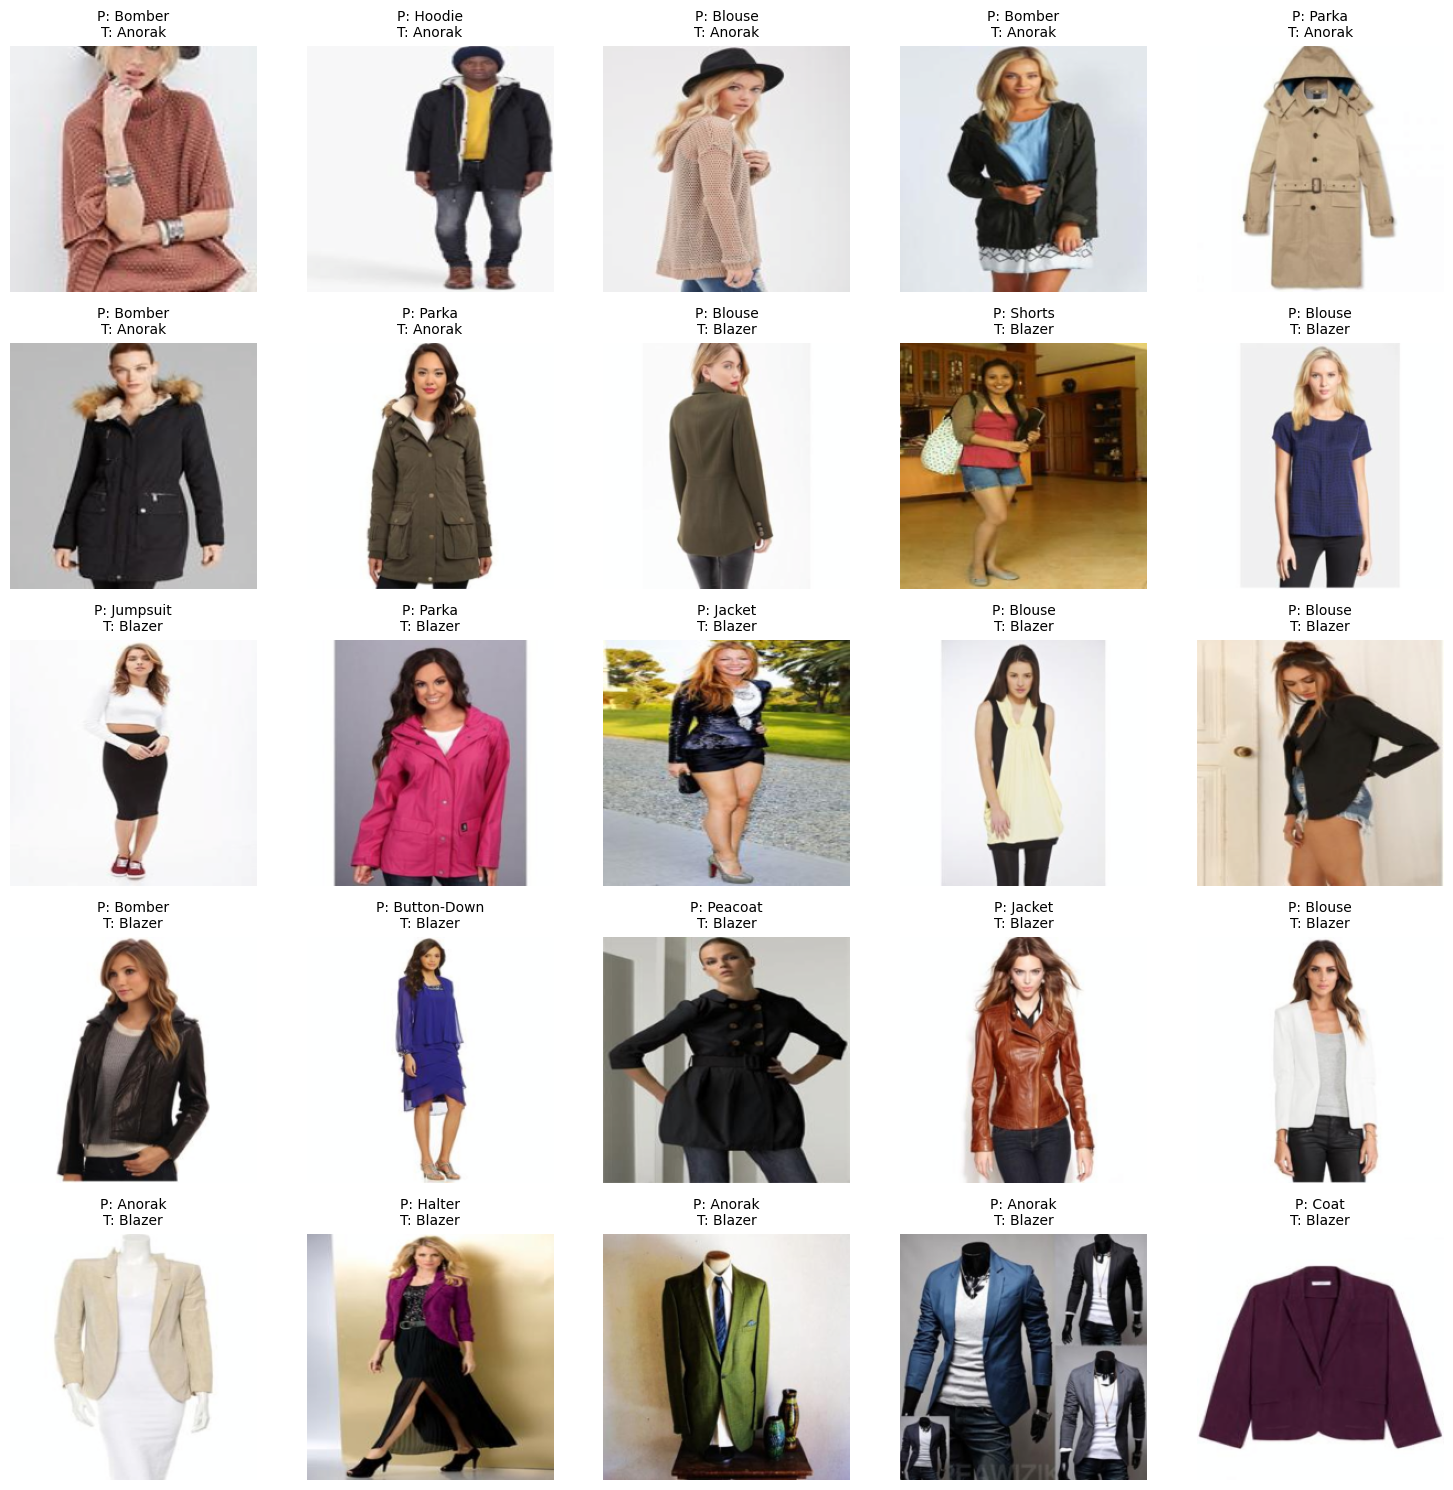

In [40]:
import torchvision

misclassified = []
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified.append((inputs[i].cpu(), predicted[i].cpu(), labels[i].cpu()))
            if len(misclassified) >= 25:  # Show 25 misclassifications
                break
    if len(misclassified) < 25:
        print(f"Only {len(misclassified)} misclassified images found.")

# Display
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
for idx, (img_tensor, pred_label, true_label) in enumerate(misclassified[:25]):
    img = img_tensor.permute(1, 2, 0).numpy()
    img = np.clip((img * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406], 0, 1)  # Unnormalize
    ax = axes[idx // 5, idx % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"P: {class_names[pred_label]}\nT: {class_names[true_label]}", fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-39-32bbc6a502a7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(counts), palette='viridis')


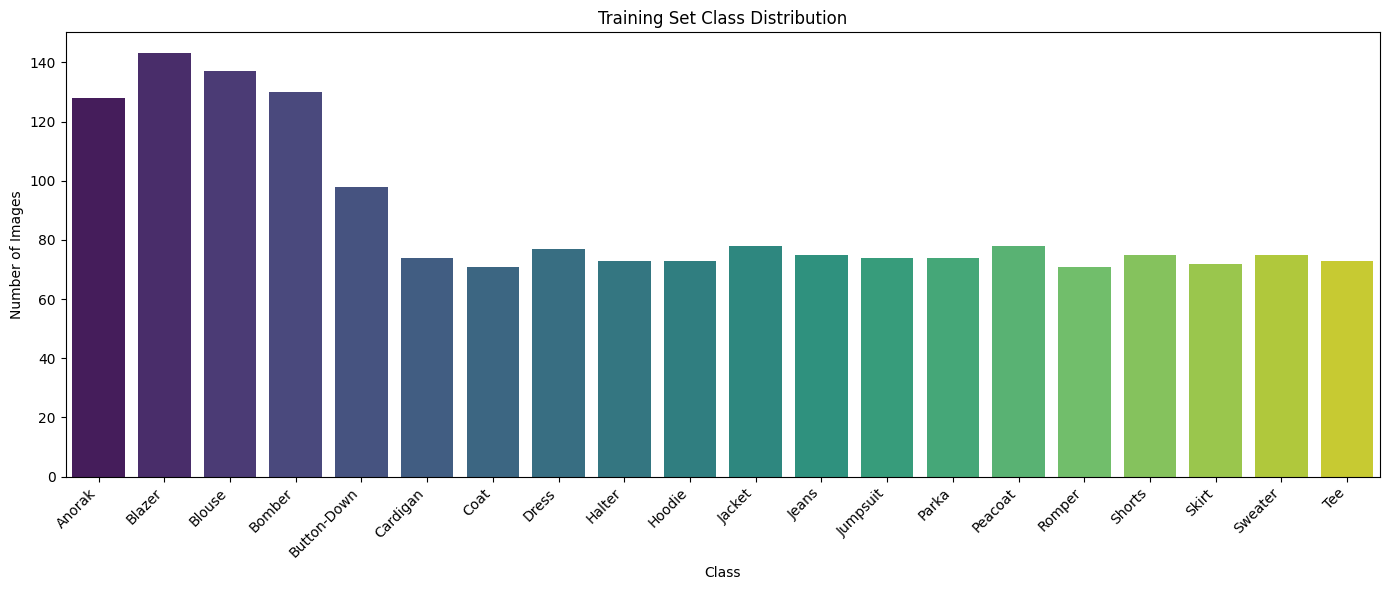

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count label frequencies
label_counts = Counter(train_dataset.targets)
class_names = train_dataset.classes

# Create a sorted list of (class name, count) pairs
sorted_counts = [(class_names[idx], label_counts[idx]) for idx in range(len(class_names))]

# Split names and values
labels, counts = zip(*sorted_counts)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=list(labels), y=list(counts), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()